In [273]:
library(readxl)
install.packages("xts")
library(xts)

Warning message:
"package 'xts' is in use and will not be installed"

In [274]:
retail_sales<-read_excel("D:\\Datasets\\New_folder_(2)\\MRTS_Retail_Trade_Sales_Data.xlsx") #reading excel spreadsheet
print(retail_sales)

# A tibble: 341 x 7
   per_idx cat_idx dt_idx et_idx geo_idx is_adj    val
     <dbl>   <dbl>  <dbl>  <dbl>   <dbl>  <dbl>  <dbl>
 1       1       5      1      0       1      0 130683
 2       2       5      1      0       1      0 131244
 3       3       5      1      0       1      0 142488
 4       4       5      1      0       1      0 147175
 5       5       5      1      0       1      0 152420
 6       6       5      1      0       1      0 151849
 7       7       5      1      0       1      0 152586
 8       8       5      1      0       1      0 152476
 9       9       5      1      0       1      0 148158
10      10       5      1      0       1      0 155987
# ... with 331 more rows


In [275]:
retail_sales_values<-retail_sales$val #selecting only the sales value column
print(retail_sales_values)

  [1] 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
 [11] 154824 191347 137020 134462 153025 158615 163519 162964 164590 163989
 [21] 159298 163992 169980 206174 145276 146332 173562 170795 175527 178509
 [31] 173198 182445 175128 178642 184272 221549 158004 155156 181910 176635
 [41] 190269 191609 182909 193370 182521 184276 193405 227552 167372 173941
 [51] 191851 191886 205797 196842 197140 204270 189424 201927 203621 237478
 [61] 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
 [71] 207533 249389 187445 183767 207973 212262 221155 220867 217687 216605
 [81] 208915 220499 218969 265618 196810 199451 230230 227109 237462 236830
 [91] 236992 240478 230665 233193 240857 293013 213709 227087 253717 239051
[101] 257581 255066 244445 257487 243624 245167 252145 294197 226791 223971
[111] 253439 249062 268658 260315 251504 266460 236210 265188 262004 298666
[121] 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
[131] 263738

In [276]:
retail_sales_ts<-ts(retail_sales_values,frequency=12,start=c(1992,1)) #converting sales values as a time series(ts) object
print(retail_sales_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287944

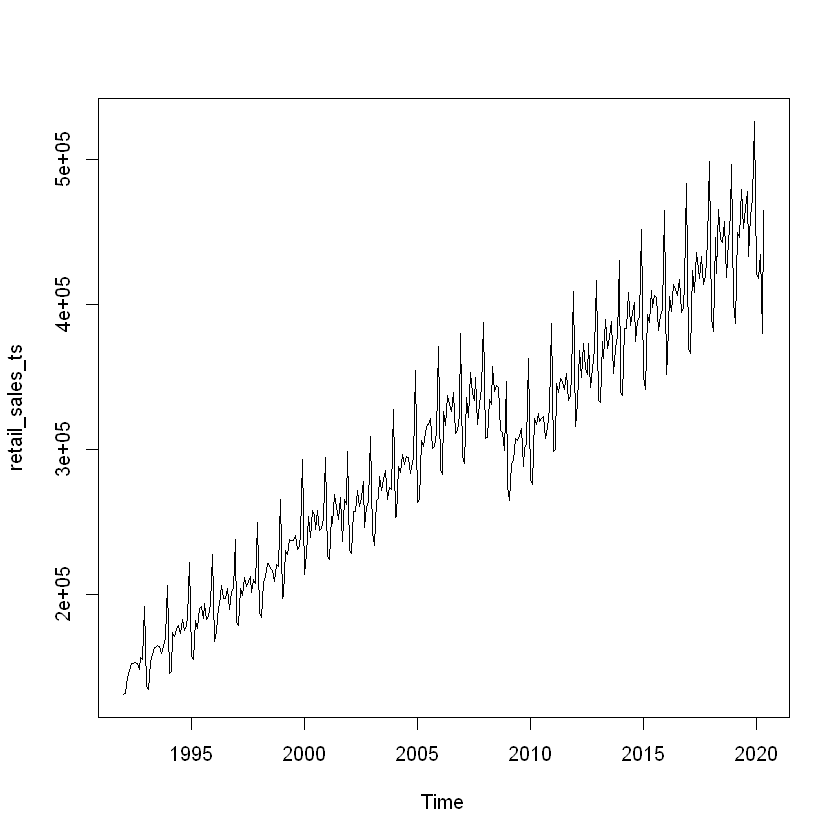

In [277]:
plot(retail_sales_ts) #plotting the ts object

We can see that there is a linear trend

In [278]:
retail_sales_ts_components<-decompose(retail_sales_ts,type="mult") #decomposing the ts object into trend,seasonal component and irregular component

In [279]:
print(retail_sales_ts_components$trend) #printing the trend values

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1992       NA       NA       NA       NA       NA       NA 151200.5 151598.6
1993 155915.4 156895.3 157839.2 158636.9 159601.9 160851.2 161813.0 162651.6
1994 168527.3 169655.0 171083.6 172353.6 173559.5 174795.6 175966.6 176864.6
1995 181139.4 181999.2 182762.5 183305.2 183920.5 184551.2 185191.7 186364.7
1996 191569.8 192616.9 193358.7 194381.8 195542.9 196382.2 197366.6 198124.5
1997 201599.6 202407.8 203227.5 204069.6 204575.0 205234.3 205996.1 206484.0
1998 210597.9 211159.7 211666.1 212410.0 213317.9 214470.6 215537.0 216580.8
1999 223819.8 225618.9 227519.8 228955.0 230395.9 232449.4 234295.0 236150.6
2000 243761.3 244780.5 246029.2 247068.1 248037.3 248557.0 249151.4 249566.7
2001 251902.5 252570.5 252635.5 253160.8 254405.8 255002.8 255345.5 255673.3
2002 257738.7 258844.8 259736.3 259940.4 259794.2 260289.5 261201.2 261914.5
2003 265718.7 266553.0 267656.2 269023.6 269960.8 271107.9 272333.7 273615.3

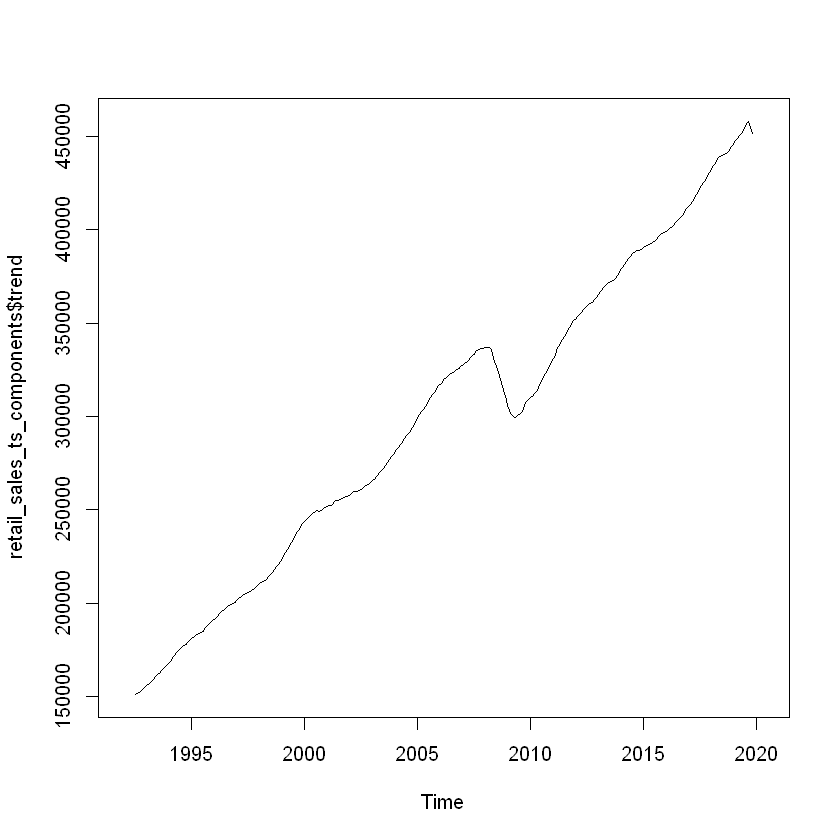

In [280]:
plot(retail_sales_ts_components$trend) #plotting the trend values

We can see that the trend is linear, but in March 2008, trend starts falling till May 2009, where it attains its local minimum value, and from June 2009, trend starts growing again

In [281]:
print(retail_sales_ts_components$seasonal)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1992 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1993 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1994 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1995 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1996 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1997 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1998 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
1999 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
2000 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
2001 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
2002 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
2003 0.8931255 0.8868599 1.0068287 0.9867362 1.0417167 1.0133598 1.0087998
2004 0.8931255 0.8868599 

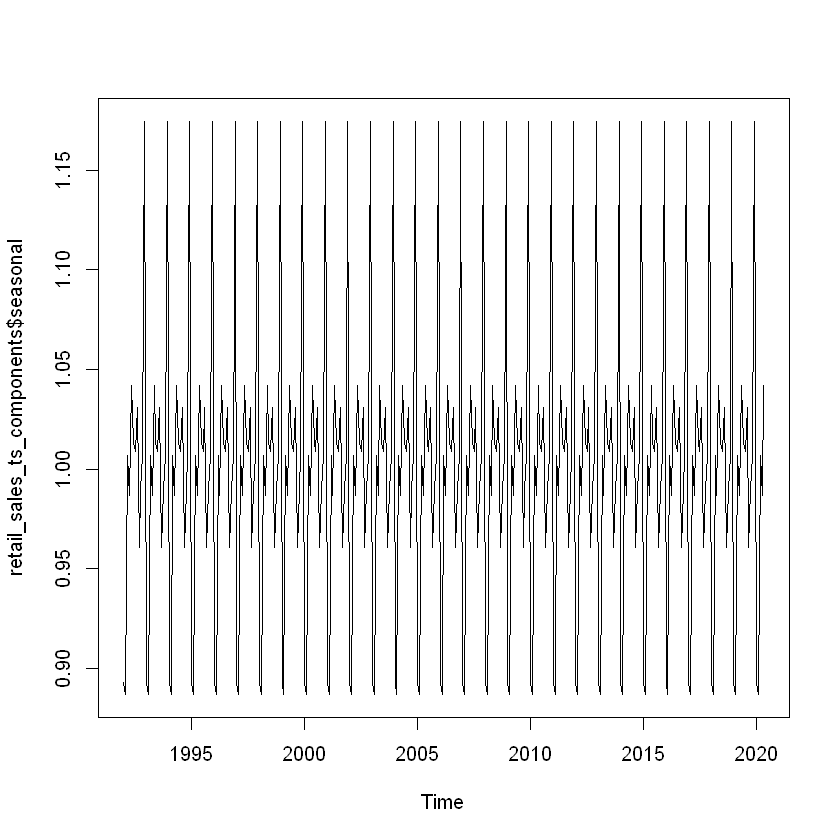

In [282]:
plot(retail_sales_ts_components$seasonal)

The seasonal indices of all the months for all the years and hence the plot is not explanable as seasonal indices for months of all the years are same. So we need seasonal indices of all the months for any one year and we should plot those to visualize the seasonal components of the dataset

In [283]:
retail_sales_ts_seasonal_xts=as.xts(retail_sales_ts_components$seasonal) #converting ts object to xts object
print(retail_sales_ts_seasonal_xts)

              [,1]
Jan 1992 0.8931255
Feb 1992 0.8868599
Mar 1992 1.0068287
Apr 1992 0.9867362
May 1992 1.0417167
Jun 1992 1.0133598
Jul 1992 1.0087998
Aug 1992 1.0310353
Sep 1992 0.9606196
Oct 1992 0.9896142
Nov 1992 1.0068845
Dec 1992 1.1744198
Jan 1993 0.8931255
Feb 1993 0.8868599
Mar 1993 1.0068287
Apr 1993 0.9867362
May 1993 1.0417167
Jun 1993 1.0133598
Jul 1993 1.0087998
Aug 1993 1.0310353
Sep 1993 0.9606196
Oct 1993 0.9896142
Nov 1993 1.0068845
Dec 1993 1.1744198
Jan 1994 0.8931255
Feb 1994 0.8868599
Mar 1994 1.0068287
Apr 1994 0.9867362
May 1994 1.0417167
Jun 1994 1.0133598
Jul 1994 1.0087998
Aug 1994 1.0310353
Sep 1994 0.9606196
Oct 1994 0.9896142
Nov 1994 1.0068845
Dec 1994 1.1744198
Jan 1995 0.8931255
Feb 1995 0.8868599
Mar 1995 1.0068287
Apr 1995 0.9867362
May 1995 1.0417167
Jun 1995 1.0133598
Jul 1995 1.0087998
Aug 1995 1.0310353
Sep 1995 0.9606196
Oct 1995 0.9896142
Nov 1995 1.0068845
Dec 1995 1.1744198
Jan 1996 0.8931255
Feb 1996 0.8868599
Mar 1996 1.0068287
Apr 1996 0.9

In [284]:
retail_sales_ts_seasonal_1992=retail_sales_ts_seasonal_xts["1992"] #selecting the seasonal indices of only 1992
print(retail_sales_ts_seasonal_1992)

              [,1]
Jan 1992 0.8931255
Feb 1992 0.8868599
Mar 1992 1.0068287
Apr 1992 0.9867362
May 1992 1.0417167
Jun 1992 1.0133598
Jul 1992 1.0087998
Aug 1992 1.0310353
Sep 1992 0.9606196
Oct 1992 0.9896142
Nov 1992 1.0068845
Dec 1992 1.1744198


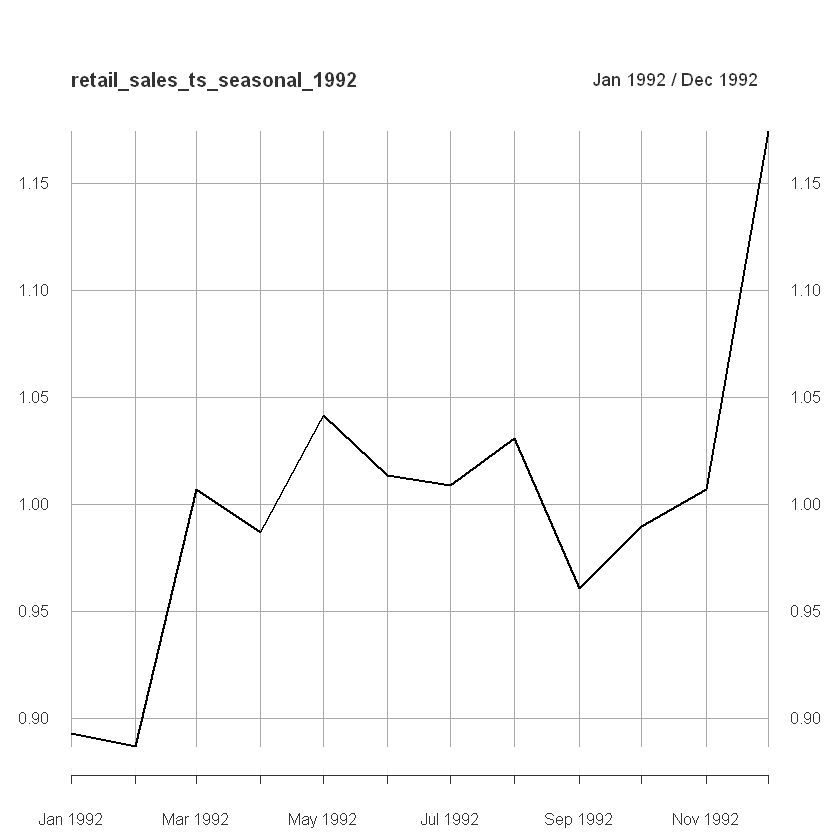

In [285]:
plot(retail_sales_ts_seasonal_1992) #plotting the seasonal indices of the dataset

Seasonal index of January is lowest and seasonal index of December is highest. This means Sales increase to its maximum in December every year and attains minimum in January every year.

In [286]:
print(retail_sales_ts_components$random) #printing the irregular component

           Jan       Feb       Mar       Apr       May       Jun       Jul
1992        NA        NA        NA        NA        NA        NA 1.0003606
1993 0.9839712 0.9663504 0.9629240 1.0133024 0.9835139 0.9997782 1.0082890
1994 0.9651860 0.9725628 1.0076060 1.0042776 0.9708361 1.0077803 0.9756806
1995 0.9766584 0.9612671 0.9885850 0.9765642 0.9930890 1.0245551 0.9790585
1996 0.9782352 1.0182456 0.9854731 1.0004299 1.0102929 0.9891270 0.9901387
1997 1.0056609 0.9939870 0.9957710 0.9893533 0.9925240 0.9880506 1.0050392
1998 0.9965690 0.9812992 0.9758883 1.0127360 0.9952216 1.0162471 1.0011648
1999 0.9845464 0.9967948 1.0050486 1.0052710 0.9893950 1.0054134 1.0026878
2000 0.9816249 1.0460691 1.0242532 0.9805570 0.9968898 1.0126582 0.9725519
2001 1.0080470 0.9998943 0.9963765 0.9970340 1.0137320 1.0073736 0.9763640
2002 1.0015334 0.9935742 0.9832626 1.0033702 1.0038801 0.9871782 1.0125058
2003 1.0208616 0.9876598 0.9816243 1.0020143 1.0009220 0.9873044 1.0167175
2004 1.0061157 1.0130430 

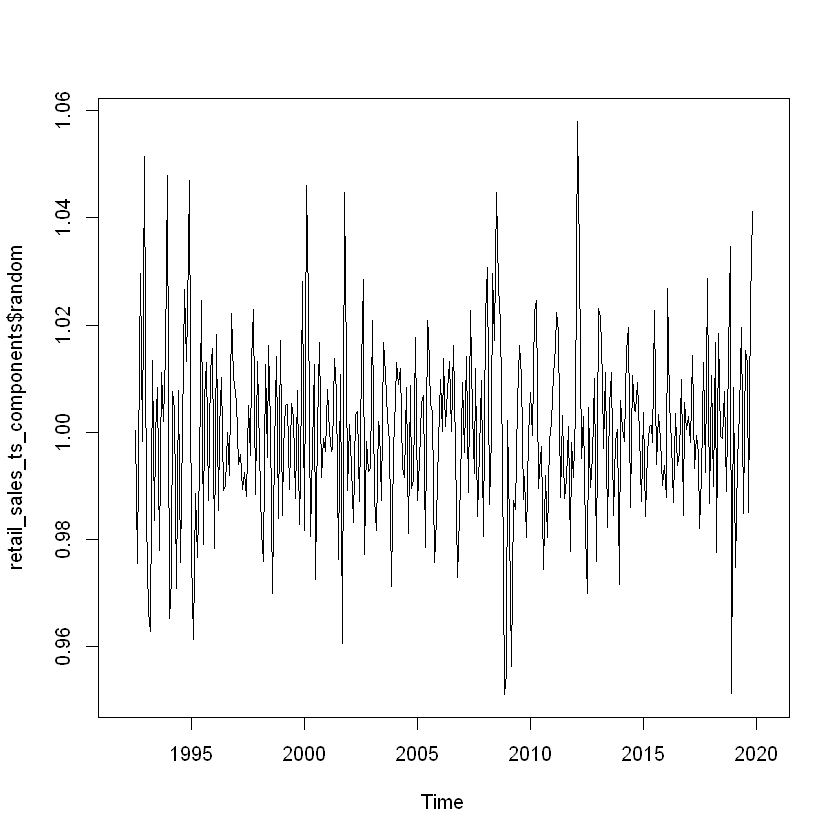

In [287]:
plot(retail_sales_ts_components$random) #plotting the irregular component

In [288]:
retail_sales_ts_subset<-window(retail_sales_ts,1992,c(2015,12)) #selecting data from January 1992 to December 2015
print(retail_sales_ts_subset)
retail_sales_ts_test_subset<-window(retail_sales_ts,start=2016) #selecting data from January 2016 to end of data, ie May 2020
print(retail_sales_ts_test_subset)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287944

In [289]:
retail_sales_ts_subset_holtwinters<-HoltWinters(retail_sales_ts_subset,seasonal="mult") #applying Holt-Winters to fit the data
print(retail_sales_ts_subset_holtwinters)

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = retail_sales_ts_subset, seasonal = "mult")

Smoothing parameters:
 alpha: 0.5134982
 beta : 0
 gamma: 0.6081845

Coefficients:
            [,1]
a   4.020156e+05
b   8.978067e+02
s1  8.982291e-01
s2  8.917385e-01
s3  1.015444e+00
s4  9.937686e-01
s5  1.046898e+00
s6  1.003432e+00
s7  1.015750e+00
s8  1.028776e+00
s9  9.589584e-01
s10 9.854518e-01
s11 9.978476e-01
s12 1.153146e+00


In [290]:
print(retail_sales_ts_subset_holtwinters$fitted) #printing the fitted data

             xhat    level    trend    season
Jan 1993 132477.9 149729.0 897.8067 0.8795106
Feb 1993 132237.3 153278.7 897.8067 0.8577009
Mar 1993 151756.7 155508.4 897.8067 0.9702727
Apr 1993 158079.4 157077.4 897.8067 1.0006594
May 1993 163183.9 158250.1 897.8067 1.0253598
Jun 1993 162447.4 159315.7 897.8067 1.0139430
Jul 1993 162981.6 160475.2 897.8067 1.0099684
Aug 1993 164163.3 162190.7 897.8067 1.0065898
Sep 1993 159701.7 162999.6 897.8067 0.9744002
Oct 1993 167833.5 163684.7 897.8067 1.0197533
Nov 1993 164523.7 162648.1 897.8067 1.0059790
Dec 1993 206671.9 166331.0 897.8067 1.2358629
Jan 1994 149159.5 167021.9 897.8067 0.8882786
Feb 1994 143574.5 165674.8 897.8067 0.8619337
Mar 1994 164489.9 168215.3 897.8067 0.9726618
Apr 1994 175090.7 173902.6 897.8067 1.0016608
May 1994 178003.8 172598.2 897.8067 1.0259823
Jun 1994 175733.4 172256.4 897.8067 1.0148955
Jul 1994 177720.2 174558.5 897.8067 1.0129026
Aug 1994 175153.6 173163.8 897.8067 1.0062735
Sep 1994 173975.6 177782.4 897.806

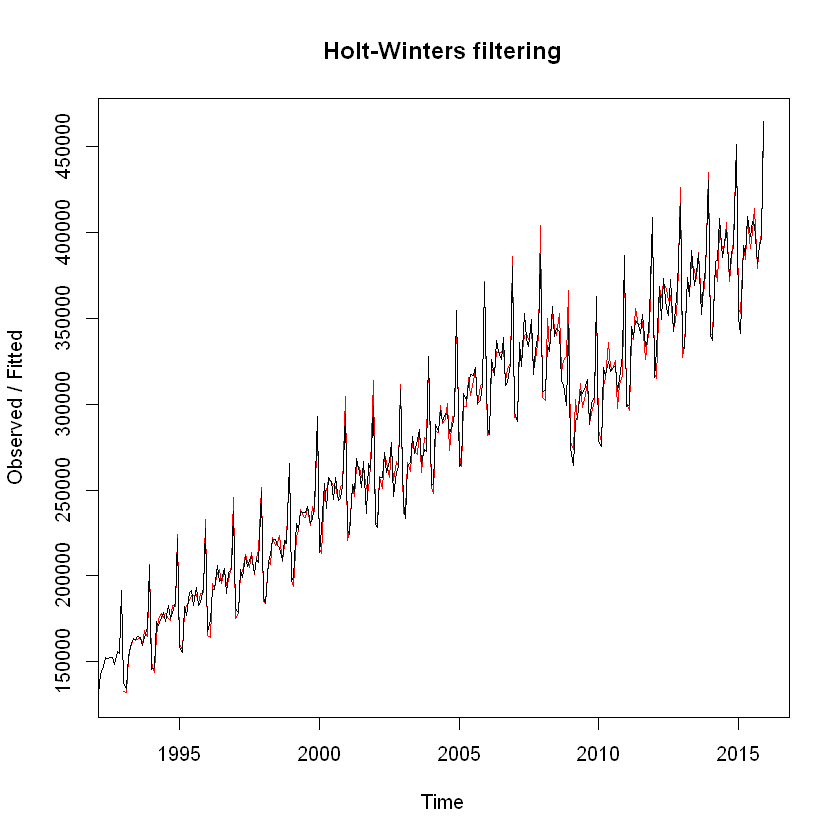

In [291]:
plot(retail_sales_ts_subset_holtwinters) #plotting the fitted data

In [292]:
print(retail_sales_ts_subset_holtwinters$SSE) #printing Error Sum of Squares

[1] 10016794727


In [293]:
library("forecast")

In [294]:
retail_sales_ts_forecast<-forecast(retail_sales_ts_subset_holtwinters,h=53) #forecasting based on fitted data
print(retail_sales_ts_forecast)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2016       361908.5 355648.5 368168.6 352334.6 371482.4
Feb 2016       360094.0 352695.7 367492.3 348779.3 371408.7
Mar 2016       410959.3 402026.3 419892.4 397297.4 424621.3
Apr 2016       403079.3 393425.7 412732.9 388315.4 417843.2
May 2016       425568.7 414769.4 436368.0 409052.5 442084.8
Jun 2016       408800.6 397628.3 419972.8 391714.1 425887.1
Jul 2016       414731.0 402768.6 426693.3 396436.1 433025.8
Aug 2016       420973.2 408246.8 433699.6 401509.9 440436.5
Sep 2016       393264.8 380632.8 405896.8 373945.9 412583.8
Oct 2016       405014.4 391487.9 418541.0 384327.3 425701.5
Nov 2016       411004.9 396764.8 425245.0 389226.6 432783.2
Dec 2016       476006.4 460529.3 491483.5 452336.2 499676.6
Jan 2017       371585.8 357165.6 386006.0 349532.0 393639.6
Feb 2017       369701.3 354821.9 384580.7 346945.3 392457.3
Mar 2017       421899.4 404900.5 438898.3 395901.9 447896.9
Apr 2017       413785.8 396624.6 430947.

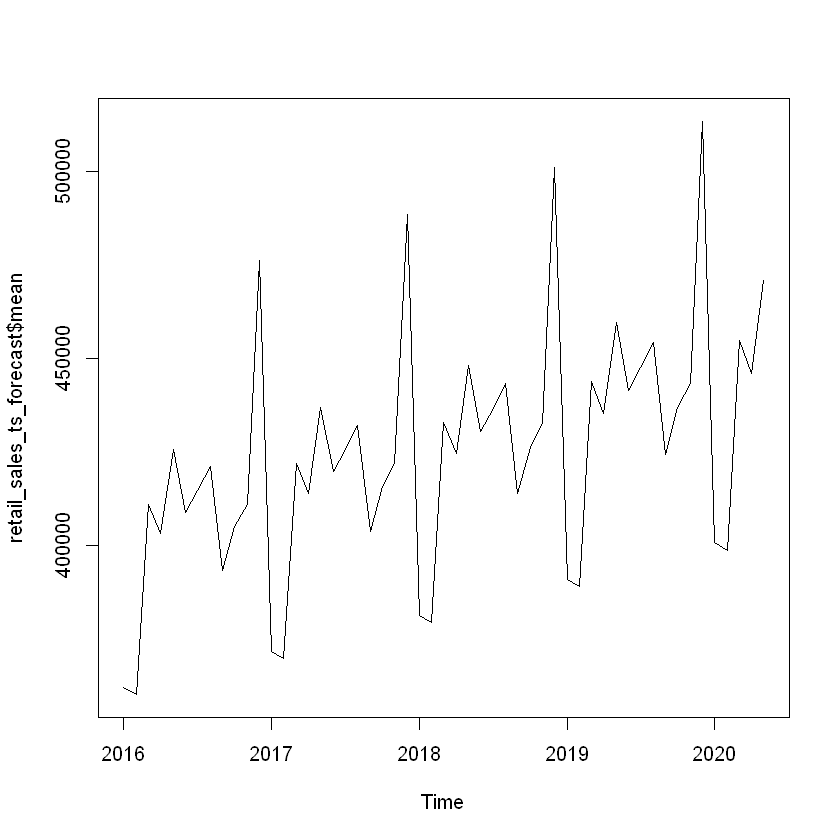

In [295]:
plot(retail_sales_ts_forecast$mean) #plotting the point forecasted values

In [296]:
retail_sales_ts_forecast_ts<-as.ts(retail_sales_ts_forecast$mean) #converting forecast object as ts object
print(retail_sales_ts_forecast_ts)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2016 361908.5 360094.0 410959.3 403079.3 425568.7 408800.6 414731.0 420973.2
2017 371585.8 369701.3 421899.4 413785.8 436847.6 419611.2 425674.3 432056.9
2018 381263.0 379308.6 432839.5 424492.4 448126.6 430421.9 436617.7 443140.6
2019 390940.2 388915.9 443779.5 435198.9 459405.5 441232.5 447561.1 454224.3
2020 400617.5 398523.2 454719.6 445905.5 470684.4                           
          Sep      Oct      Nov      Dec
2016 393264.8 405014.4 411004.9 476006.4
2017 403596.4 415631.4 421755.4 488430.0
2018 413927.9 426248.3 432505.9 500853.7
2019 424259.4 436865.2 443256.4 513277.3
2020                                    


In [297]:
retail_sales_ts_forecast_xts<-as.xts(retail_sales_ts_forecast_ts) #converting ts object to xts object
print(retail_sales_ts_forecast_xts)

             [,1]
Jan 2016 361908.5
Feb 2016 360094.0
Mar 2016 410959.3
Apr 2016 403079.3
May 2016 425568.7
Jun 2016 408800.6
Jul 2016 414731.0
Aug 2016 420973.2
Sep 2016 393264.8
Oct 2016 405014.4
Nov 2016 411004.9
Dec 2016 476006.4
Jan 2017 371585.8
Feb 2017 369701.3
Mar 2017 421899.4
Apr 2017 413785.8
May 2017 436847.6
Jun 2017 419611.2
Jul 2017 425674.3
Aug 2017 432056.9
Sep 2017 403596.4
Oct 2017 415631.4
Nov 2017 421755.4
Dec 2017 488430.0
Jan 2018 381263.0
Feb 2018 379308.6
Mar 2018 432839.5
Apr 2018 424492.4
May 2018 448126.6
Jun 2018 430421.9
Jul 2018 436617.7
Aug 2018 443140.6
Sep 2018 413927.9
Oct 2018 426248.3
Nov 2018 432505.9
Dec 2018 500853.7
Jan 2019 390940.2
Feb 2019 388915.9
Mar 2019 443779.5
Apr 2019 435198.9
May 2019 459405.5
Jun 2019 441232.5
Jul 2019 447561.1
Aug 2019 454224.3
Sep 2019 424259.4
Oct 2019 436865.2
Nov 2019 443256.4
Dec 2019 513277.3
Jan 2020 400617.5
Feb 2020 398523.2
Mar 2020 454719.6
Apr 2020 445905.5
May 2020 470684.4


In [298]:
print(retail_sales_ts_test_subset) #printing the actual data upon which forecasts have been made, this is a ts object

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2016 351931 363688 405312 395099 413410 410449 406195 416863 394600 397627
2017 369241 365865 423634 408175 435790 424415 418069 433057 413638 418956
2018 390170 381258 445835 421257 465223 444720 442975 457386 418629 443581
2019 401341 386840 449507 445959 479466 452242 466160 477537 433299 460534
2020 421093 417777 434185 380223 465086                                   
        Nov    Dec
2016 414703 483081
2017 443586 498725
2018 461965 496469
2019 473026 526295
2020              


In [299]:
retail_sales_ts_test_subset_xts<-as.xts(retail_sales_ts_test_subset) #converting the ts object to xts object for actual data
print(retail_sales_ts_test_subset_xts)

           [,1]
Jan 2016 351931
Feb 2016 363688
Mar 2016 405312
Apr 2016 395099
May 2016 413410
Jun 2016 410449
Jul 2016 406195
Aug 2016 416863
Sep 2016 394600
Oct 2016 397627
Nov 2016 414703
Dec 2016 483081
Jan 2017 369241
Feb 2017 365865
Mar 2017 423634
Apr 2017 408175
May 2017 435790
Jun 2017 424415
Jul 2017 418069
Aug 2017 433057
Sep 2017 413638
Oct 2017 418956
Nov 2017 443586
Dec 2017 498725
Jan 2018 390170
Feb 2018 381258
Mar 2018 445835
Apr 2018 421257
May 2018 465223
Jun 2018 444720
Jul 2018 442975
Aug 2018 457386
Sep 2018 418629
Oct 2018 443581
Nov 2018 461965
Dec 2018 496469
Jan 2019 401341
Feb 2019 386840
Mar 2019 449507
Apr 2019 445959
May 2019 479466
Jun 2019 452242
Jul 2019 466160
Aug 2019 477537
Sep 2019 433299
Oct 2019 460534
Nov 2019 473026
Dec 2019 526295
Jan 2020 421093
Feb 2020 417777
Mar 2020 434185
Apr 2020 380223
May 2020 465086


In [300]:
retail_sales_fitted_vs_test<-merge(retail_sales_ts_test_subset_xts,retail_sales_ts_forecast_xts) #merging two xts object, one is actual data,the other is forecasted data
print(retail_sales_fitted_vs_test)

         retail_sales_ts_test_subset_xts retail_sales_ts_forecast_xts
Jan 2016                          351931                     361908.5
Feb 2016                          363688                     360094.0
Mar 2016                          405312                     410959.3
Apr 2016                          395099                     403079.3
May 2016                          413410                     425568.7
Jun 2016                          410449                     408800.6
Jul 2016                          406195                     414731.0
Aug 2016                          416863                     420973.2
Sep 2016                          394600                     393264.8
Oct 2016                          397627                     405014.4
Nov 2016                          414703                     411004.9
Dec 2016                          483081                     476006.4
Jan 2017                          369241                     371585.8
Feb 2017            

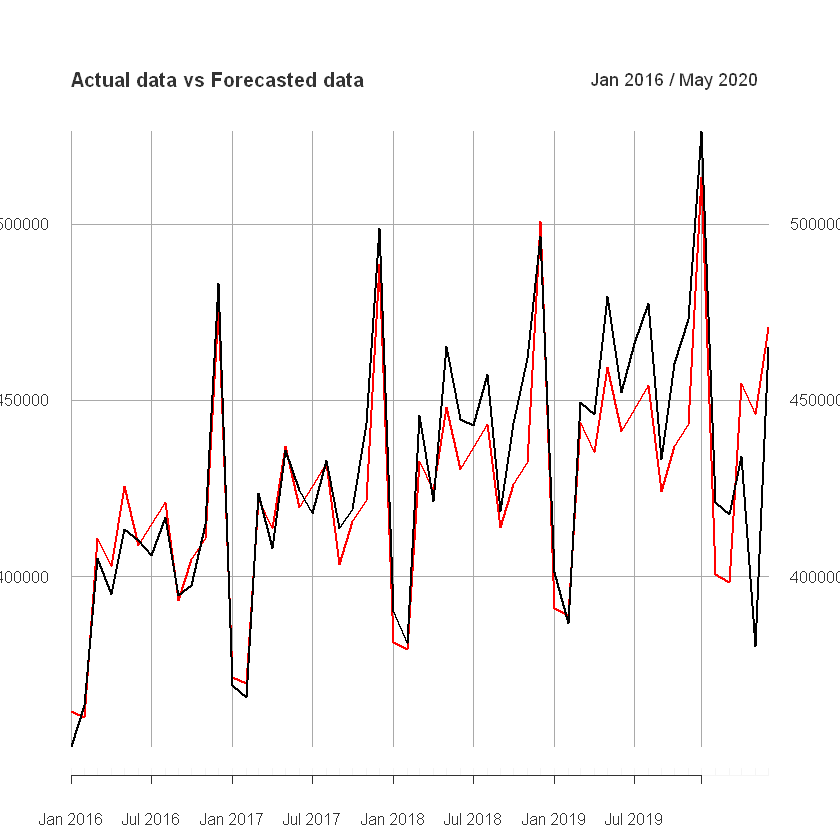

In [301]:
plot(retail_sales_fitted_vs_test,main="Actual data vs Forecasted data") #plotting actual data and forecasted data from January 2016 to May 2020

It can be seen that the forecast is good as the two plots agree with each other

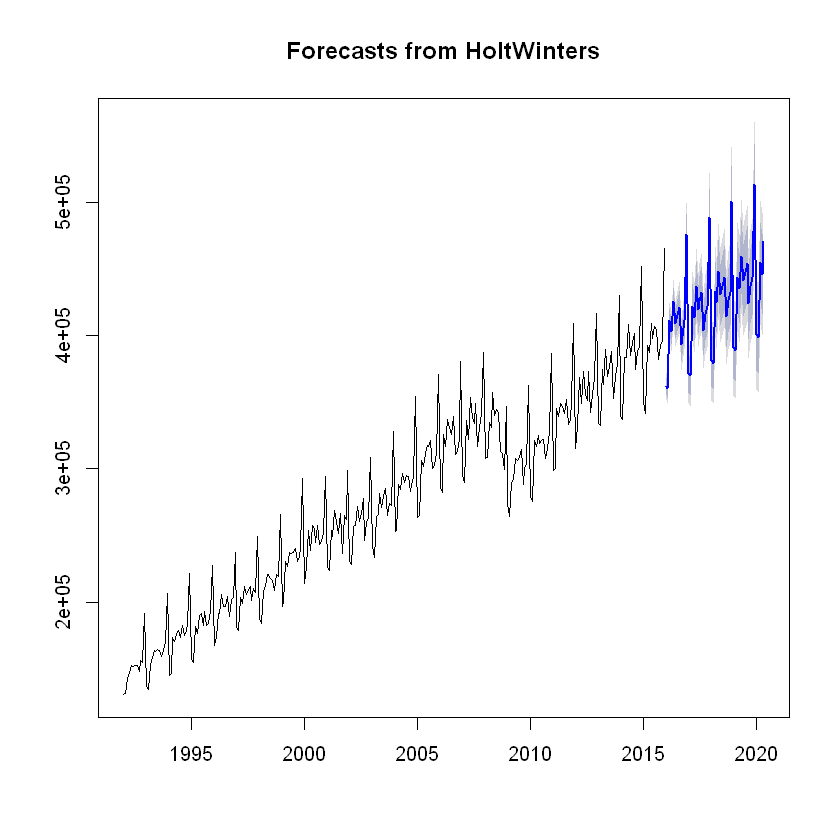

In [302]:
plot(retail_sales_ts_forecast) #plotting the whole data along with forecasted data

In [303]:
print(accuracy(retail_sales_ts_forecast,retail_sales_ts_test_subset)) #Different error measures for the forecasted data

                     ME      RMSE       MAE          MPE     MAPE      MASE
Training set  -42.49634  6024.345  4574.718 -0.004701612 1.659241 0.3266956
Test set     4434.97925 15382.939 11143.045  0.890589521 2.575511 0.7957613
                    ACF1 Theil's U
Training set -0.03028839        NA
Test set      0.41410281 0.3677347


The measures calculated are:

ME: Mean Error

RMSE: Root Mean Squared Error

MAE: Mean Absolute Error

MPE: Mean Percentage Error

MAPE: Mean Absolute Percentage Error

MASE: Mean Absolute Scaled Error

ACF1: Autocorrelation of errors at lag 1.